# Task 1

---

## Web scraping and analysis

This Jupyter notebook includes some code to get you started with web scraping. We will use a package called `BeautifulSoup` to collect the data from the web. Once you've collected your data and saved it into a local `.csv` file you should start with your analysis.

### Scraping data from Skytrax

If you visit [https://www.airlinequality.com] you can see that there is a lot of data there. For this task, we are only interested in reviews related to British Airways and the Airline itself.

If you navigate to this link: [https://www.airlinequality.com/airline-reviews/british-airways] you will see this data. Now, we can use `Python` and `BeautifulSoup` to collect all the links to the reviews and then to collect the text data on each of the individual review links.

In [2]:
import requests
from bs4 import BeautifulSoup
import pandas as pd

In [4]:
base_url = "https://www.airlinequality.com/airline-reviews/british-airways"
pages = 10
page_size = 100

reviews = []

# for i in range(1, pages + 1):
for i in range(1, pages + 1):

    print(f"Scraping page {i}")

    # Create URL to collect links from paginated data
    url = f"{base_url}/page/{i}/?sortby=post_date%3ADesc&pagesize={page_size}"

    # Collect HTML data from this page
    response = requests.get(url)

    # Parse content
    content = response.content
    parsed_content = BeautifulSoup(content, 'html.parser')
    for para in parsed_content.find_all("div", {"class": "text_content"}):
        reviews.append(para.get_text())
    
    print(f"   ---> {len(reviews)} total reviews")

Scraping page 1
   ---> 100 total reviews
Scraping page 2
   ---> 200 total reviews
Scraping page 3
   ---> 300 total reviews
Scraping page 4
   ---> 400 total reviews
Scraping page 5
   ---> 500 total reviews
Scraping page 6
   ---> 600 total reviews
Scraping page 7
   ---> 700 total reviews
Scraping page 8
   ---> 800 total reviews
Scraping page 9
   ---> 900 total reviews
Scraping page 10
   ---> 1000 total reviews


In [5]:
df = pd.DataFrame()
df["reviews"] = reviews
df.head()

,reviews
0,✅ Trip Verified | My partner and I were on the...
1,Not Verified | We had a Premium Economy retur...
2,✅ Trip Verified | I should like to review my ...
3,✅ Trip Verified | We have flown with British A...
4,✅ Trip Verified | I sat in the plane at Vienna...


In [7]:
df.to_csv("BA_reviews.csv")

Congratulations! Now you have your dataset for this task! The loops above collected 1000 reviews by iterating through the paginated pages on the website. However, if you want to collect more data, try increasing the number of pages!

 The next thing that you should do is clean this data to remove any unnecessary text from each of the rows. For example, "✅ Trip Verified" can be removed from each row if it exists, as it's not relevant to what we want to investigate.

In [20]:
df["clean_reviews"] = df["reviews"].str.split("|",expand=True)[1]

In [23]:
df = df.drop(columns=["reviews"])
df.head()

,clean_reviews
0,My partner and I were on the BA2166 return fl...
1,We had a Premium Economy return flight Los A...
2,I should like to review my flight with Briti...
3,We have flown with British Airways a few time...
4,I sat in the plane at Vienna airport for thre...


## Using Vader

In [24]:
from vaderSentiment.vaderSentiment import SentimentIntensityAnalyzer
import nltk

nltk.download("vader_lexicon")

[nltk_data] Downloading package vader_lexicon to
[nltk_data]     C:\Users\91852\AppData\Roaming\nltk_data...


True

In [28]:
def add_sentiment_score(df):
    analyzer = SentimentIntensityAnalyzer()
    df['sentiment_score'] = df['clean_reviews'].apply(lambda x: analyzer.polarity_scores(x)['compound'])
    return df

In [29]:
df = add_sentiment_score(df)

In [30]:
df.head()

,clean_reviews,sentiment_score
0,My partner and I were on the BA2166 return fl...,0.9514
1,We had a Premium Economy return flight Los A...,0.9034
2,I should like to review my flight with Briti...,0.9913
3,We have flown with British Airways a few time...,-0.9832
4,I sat in the plane at Vienna airport for thre...,0.0000


Labeling sentiment scores from Vader as positive, negative and nuetral

In [31]:
def analyze_score(score):
    if score>=0.5:
        return "Positive"
    elif score<0:
        return "Negative"
    else:
        return "Nuetral"
    
df["analysis"] = df["sentiment_score"].apply(analyze_score)
df.head()

,clean_reviews,sentiment_score,analysis
0,My partner and I were on the BA2166 return fl...,0.9514,Positive
1,We had a Premium Economy return flight Los A...,0.9034,Positive
2,I should like to review my flight with Briti...,0.9913,Positive
3,We have flown with British Airways a few time...,-0.9832,Negative
4,I sat in the plane at Vienna airport for thre...,0.0000,Nuetral


In [35]:
count = df["analysis"].value_counts()
count

analysis
Negative    519
Positive    399
Nuetral      82
Name: count, dtype: int64

## Reviews Sentiment Distribution

([<matplotlib.patches.Wedge at 0x2a8da2fc050>,
 [Text(-0.0656202821455366, 1.0980409730839467, 'Negative'),
  Text(-0.21629384324436796, -1.078525369833543, 'Positive'),
  Text(1.3054519738298946, -0.34394061118692043, 'Nuetral')],
 [Text(-0.03579288117029268, 0.5989314398639708, '51.9%'),
  Text(-0.11797845995147342, -0.5882865653637507, '39.9%'),
  Text(0.8219512427817854, -0.21655519963620914, '8.2%')])

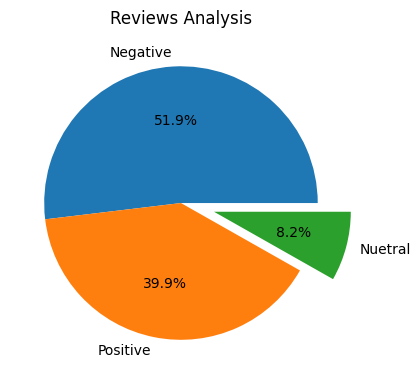

In [39]:
import matplotlib.pyplot as plt
plt.figure(figsize=(15,7))

plt.subplot(1,3,2)
plt.title("Reviews Analysis")
plt.pie(count.values, labels = count.index, explode = (0, 0, 0.25), autopct='%1.1f%%')

---
## Frequently used words in Negative reviews

In [3]:
df = pd.read_csv("Cleaned_BA_reviews.csv")
df.head()

,Unnamed: 0,clean_reviews,sentiment_score,analysis
0,0,My partner and I were on the BA2166 return fl...,0.9514,Positive
1,1,We had a Premium Economy return flight Los A...,0.9034,Positive
2,2,I should like to review my flight with Briti...,0.9913,Positive
3,3,We have flown with British Airways a few time...,-0.9832,Negative
4,4,I sat in the plane at Vienna airport for thre...,0.0000,Nuetral


In [4]:
from nltk.corpus import stopwords
import string
stop_words = set(stopwords.words('english'))

def preprocess_text(text):
    # Remove punctuation
    text = text.translate(str.maketrans('', '', string.punctuation))
    # Remove stop words
    text = ' '.join([word for word in text.split() if word.lower() not in stop_words])
    return text

In [5]:
#Number of Unique Words in the Reviews, after removing stop words and punctuations
vocab = set()
for sen in df["clean_reviews"]:
    sentence = preprocess_text(sen)
    [vocab.update(sentence.split())]

print("Vocab Size: ",len(vocab))

Vocab Size:  9266


In [6]:
# Number of Words in the NEGATIVE Reviews, after removing stop words and punctuations
negative_df = df[df["sentiment_score"]<0]

total_words = []
for sen in negative_df["clean_reviews"]:
    sentence = preprocess_text(sen)
    [total_words.append(i) for i in sentence.split()]

print("Total number of words:",len(total_words))

Total number of words: 41446


In [7]:
import collections
counter = collections.Counter(total_words)
freq = dict(counter)
print(len(freq.keys()))

6375


In [10]:
sorted_freq = sorted(freq.items(),reverse=True,key=lambda x:x[1])
sorted_freq[:10]

[('flight', 1016),
 ('BA', 643),
 ('service', 338),
 ('London', 280),
 ('us', 254),
 ('British', 249),
 ('Airways', 238),
 ('hours', 235),
 ('time', 235),
 ('one', 225)]

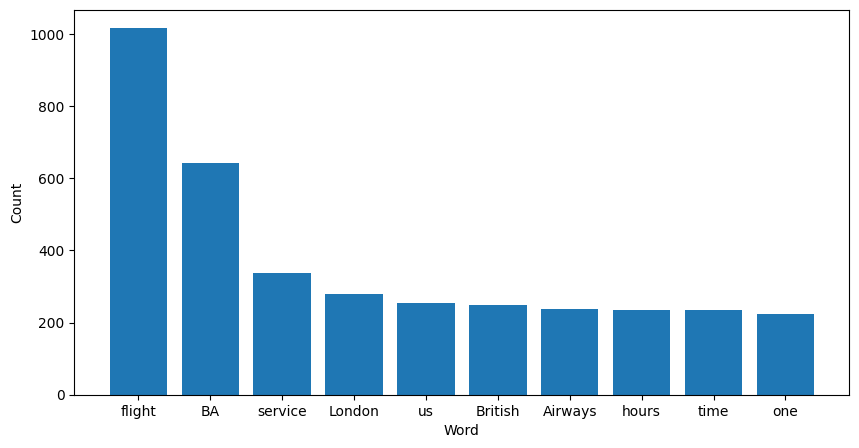

In [9]:
import matplotlib.pyplot as plt

plt.figure(figsize=(10,5))
words = [i[0] for i in sorted_freq[:10]]
val = [i[1] for i in sorted_freq[:10]]
plt.bar(words,val)
plt.xlabel("Word")
plt.ylabel("Count")
plt.show()